# Mingzhen JIANG 
# 21108128

Blockchain Assignment3 Problem3

Problem description: 
Implement a basic trading strategy using a 3-day and 7-day simple moving average (SMA) on Ethereum’s daily price data for the past 150 days. Plot the Ethereum price along with the 3-day and 7-day moving averages and mark the buy and sell signals.

1. Fetch Ethereum Price Data:
Using the provided Python script, retrieve the Ethereum price data for the last 150 days.

2. Calculate Moving Averages:
• Calculate the 3-day SMA and the 7-day SMA on the price data.
• Generate a ”buy” signal when the 3-day SMA crosses above the 7-day SMA (indicating an uptrend).
• Generate a ”sell” signal when the 3-day SMA crosses below the 7-day SMA (indicating a downtrend).

3. Visualize the Strategy:
• Plot the daily Ethereum price line.
• Plot the 3-day and 7-day SMA lines.
• Mark the buy signals with a green dot and sell signals with a red dot on the plot.
You can use the matplotlib library in Python to create the visualizations.
Here are some hints:
• To plot a line chart, use the plot() function from matplotlib.pyplot.
• To set the x-axis tick interval (e.g., every 30 days), you can use mdates.DayLocator(interval=30) along with mdates.DateFormatter() for formatting the date labels.
• To add labels to the x-axis and y-axis, use xlabel() and ylabel().
• To add a legend to describe each line or marker, use legend().

Data fetched and saved as ethereum_data.csv


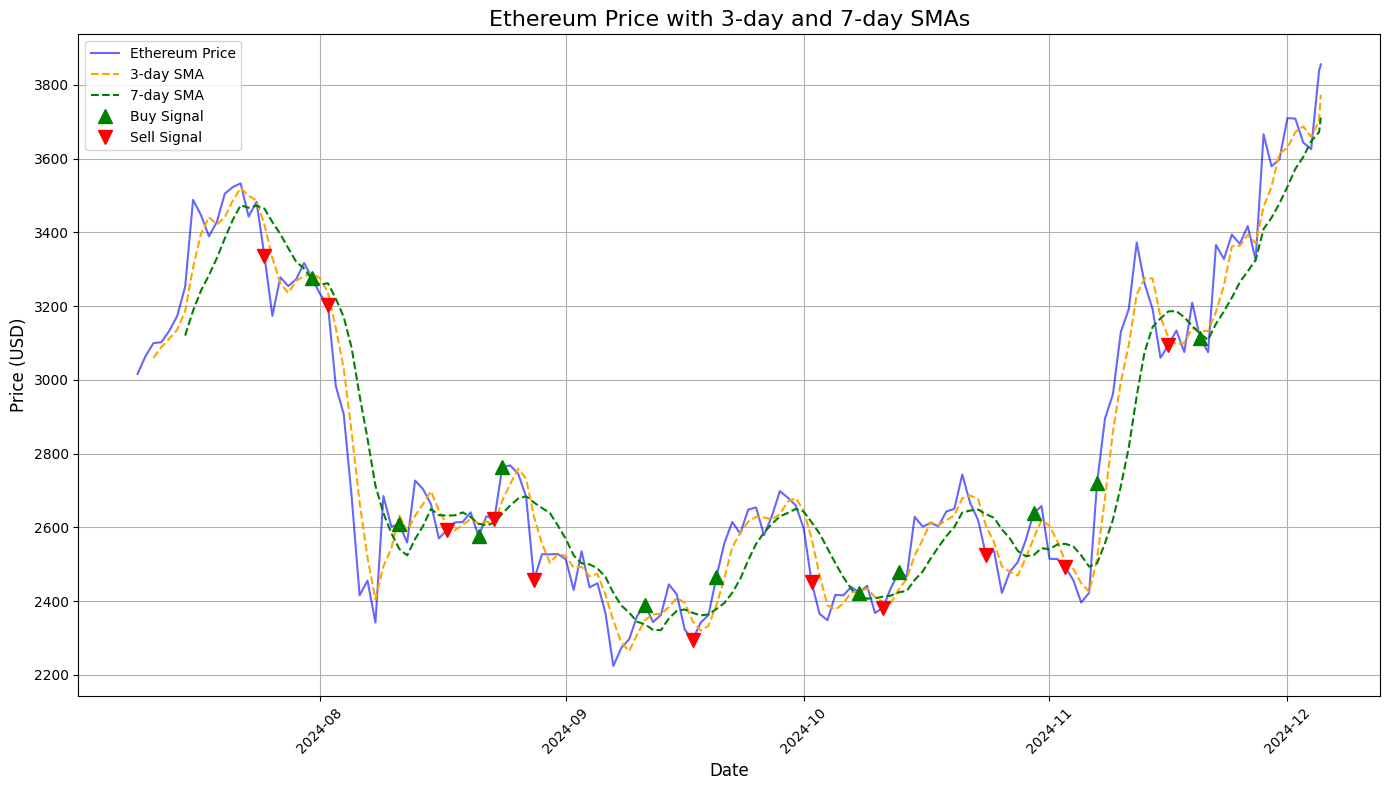

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Fetch Ethereum price data from CoinGecko
def fetch_market_data(token, days):
    # Fetch daily market data for Ethereum (ETH) over the last 150 days
    url = f"https://api.coingecko.com/api/v3/coins/{token}/market_chart"
    params = {"vs_currency": "usd", "days": days, "interval": "daily"}
    response = requests.get(url, params=params)
    data = response.json()

    # Process data into DataFrame
    timestamps = [item[0] for item in data['prices']]
    prices = [item[1] for item in data['prices']]
    df = pd.DataFrame({"timestamp": pd.to_datetime(timestamps, unit='ms'), "price": prices})
    
    # Save to CSV (optional)
    df.to_csv("ethereum_data.csv", index=False)
    print("Data fetched and saved as ethereum_data.csv")

    return df

# Calculate Simple Moving Averages (SMA)
def calculate_sma(df, window):
    return df['price'].rolling(window=window).mean()

# Generate buy and sell signals based on SMA crossovers
def generate_signals(df):
    # Create signals for Buy and Sell
    df['3_day_sma'] = calculate_sma(df, 3)
    df['7_day_sma'] = calculate_sma(df, 7)
    
    # Buy signal: 3-day SMA crosses above 7-day SMA
    df['buy_signal'] = (df['3_day_sma'] > df['7_day_sma']) & (df['3_day_sma'].shift(1) <= df['7_day_sma'].shift(1))
    
    # Sell signal: 3-day SMA crosses below 7-day SMA
    df['sell_signal'] = (df['3_day_sma'] < df['7_day_sma']) & (df['3_day_sma'].shift(1) >= df['7_day_sma'].shift(1))
    
    return df

# Plotting the price and SMAs, and marking the buy/sell signals
def plot_data(df):
    plt.figure(figsize=(14, 8))
    plt.plot(df['timestamp'], df['price'], label="Ethereum Price", color='blue', alpha=0.6)
    plt.plot(df['timestamp'], df['3_day_sma'], label="3-day SMA", color='orange', linestyle='--')
    plt.plot(df['timestamp'], df['7_day_sma'], label="7-day SMA", color='green', linestyle='--')

    # Plot Buy signals (green arrows)
    plt.plot(df[df['buy_signal']].timestamp, df[df['buy_signal']]['price'], '^', markersize=10, color='green', lw=0, label='Buy Signal')

    # Plot Sell signals (red arrows)
    plt.plot(df[df['sell_signal']].timestamp, df[df['sell_signal']]['price'], 'v', markersize=10, color='red', lw=0, label='Sell Signal')

    plt.title("Ethereum Price with 3-day and 7-day SMAs", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Price (USD)", fontsize=12)
    plt.legend(loc="upper left")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Main function to fetch data, calculate indicators, and plot
def main():
    # Fetch last 150 days of Ethereum data
    df = fetch_market_data("ethereum", 150)

    # Generate trading signals (Buy and Sell)
    df = generate_signals(df)

    # Plot the data
    plot_data(df)

if __name__ == "__main__":
    main()


4. Describe Observations:
• Briefly summarize what you observe from the visualization: Do the buy/sell signals align with the price trends?

From the visualization (assuming the chart includes Ethereum price data, 3-day and 7-day SMAs, along with buy and sell signals), here’s a general summary:
1. Price Trend and SMAs:
   - The 3-day SMA is more sensitive to recent price changes because it considers the average of the last 3 days. It reacts quicker to short-term price fluctuations.
   - The 7-day SMA is smoother and less sensitive, reflecting longer-term trends in the price.
   - When the 3-day SMA crosses above the 7-day SMA, it indicates a potential bullish trend (uptrend), signaling a buying opportunity.
   - Conversely, when the 3-day SMA crosses below the 7-day SMA, it signals a bearish trend (downtrend), suggesting a potential sell.

2. Buy and Sell Signals:
    - Buy Signals (indicated by green arrows): These occur when the 3-day SMA crosses above the 7-day SMA, typically indicating that the price is starting to rise. This can be a good entry point for buying.
    - The buy signals often align with the early stages of upward price movements.
    - Sell Signals (indicated by red arrows): These appear when the 3-day SMA crosses below the 7-day SMA, which can signal the start of a downtrend.
    - The sell signals often occur near the peak or after the price has begun to drop, acting as a signal to exit the position.

3. Signal Accuracy:
    - In general, the buy signals tend to appear during price rallies or when there is a shift from consolidation to an uptrend.
    - The sell signals often appear after a price surge, marking the end of an upward move, before the price begins to correct.
    - Crossover timing is crucial: early buy signals catch the upward movement, but they can also lead to false positives if the market doesn't continue its upward trend.
    - Sell signals often occur during corrections or trend reversals, but delayed signals may miss the top of the market, as the SMAs lag behind the price.

4. Market Noise and Delays:
    - In volatile or sideways markets, the SMAs might give frequent buy/sell signals that may not align perfectly with significant price movements. This is because moving averages are lagging indicators that smooth out price data.
    - For highly volatile periods, there might be whipsaw signals, where the SMAs cross back and forth quickly, generating false buy/sell signals.

Conclusion:
a. Buy and sell signals largely align with price trends when the market is trending clearly either up or down. The strategy works well during directional moves but may result in missed opportunities or false signals during consolidation or choppy markets.
b. The SMA crossover strategy is a classic and effective trend-following approach, but it may not always capture the best entry or exit points, especially in a sideways or ranging market.